# Titanic Decision Tree

Dataset taken from kaggle!

Date: 2023/10/10

Highest Score: **0.7751**

## Importing data

In [1]:
import pandas as pd
%precision 3


'%.3f'

In [2]:
import_df = pd.read_csv("../raw_data/train.csv")
import_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
feature_ls = ["Pclass", "Sex", "Age", "Fare"]
columns_ls = feature_ls + ["Survived"]
raw_df = import_df[columns_ls]
raw_df = raw_df.dropna()


In [4]:
X = raw_df.drop(columns="Survived")
y = raw_df["Survived"]
X.shape, y.shape


((714, 4), (714,))

## Preprocess features

In [5]:
def preprocess_gender(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[df["Sex"] == "male", "Sex"] = 1
    df.loc[df["Sex"] == "female", "Sex"] = 0
    return df


In [6]:
X = preprocess_gender(X)
X.head(1)


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.25


In [7]:
X.describe()


,Pclass,Age,Fare
count,714.000000,714.000000,714.000000
mean,2.236695,29.699118,34.694514
std,0.838250,14.526497,52.918930
min,1.000000,0.420000,0.000000
25%,1.000000,20.125000,8.050000
50%,2.000000,28.000000,15.741700
75%,3.000000,38.000000,33.375000
max,3.000000,80.000000,512.329200


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)


In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)
clf.fit(X_val, y_val)


DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

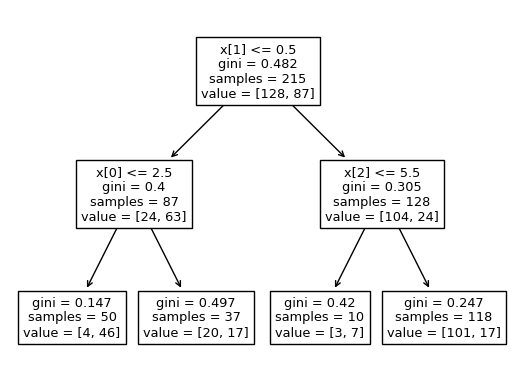

In [10]:
from sklearn import tree
from matplotlib import pyplot as plt

tree.plot_tree(clf)
plt.show()


## Fine tuning

In [11]:
clf.score(X_val, y_val)


0.809

## Test with test dataset

In [12]:
test_df = pd.read_csv("../raw_data/test.csv")
pass_id = test_df["PassengerId"]
X_test = test_df[feature_ls]
X_test = preprocess_gender(X_test)
y = clf.predict(X_test)


In [13]:
submit_df = pd.DataFrame(data={"PassengerId": pass_id, "Survived":y})
submit_df.to_csv("../submission/2023-10-10_decision_tree_1.csv", index=False)
